### data2prompt
从 chatharuhi 数据集中提取 凉宫春日相关的对话，并且整理为 qwen 的prompt格式

In [1]:
import json
import os

jsonl_file_path = './ChatHaruhi-54K-Role-Playing-Dialogue/Haruhi_54K_v1.jsonl'
# 提取并保存haruhi的对话
haruhi_dialogues = []
with open(jsonl_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        dialogue = json.loads(line.strip())
        # 检查是否是haruhi的对话
        if dialogue.get('agent_role_name_en') == 'haruhi':
            haruhi_dialogues.append(dialogue)

print(f"Total haruhi dialogues extracted: {len(haruhi_dialogues)}")
print(haruhi_dialogues[:2]) 

Total haruhi dialogues extracted: 1163
[{'user_role': '阿虚', 'user_question': '「会议？那是啥啊」', 'agent_role': '春日', 'agent_response': '「会议是一种集思广益、讨论问题、做决策的方式。我们可以在会议上共同商讨SOS团的活动计划、解决问题，以及分享各自的想法和建议。」', 'question_source': 'story', 'more_dialogues': [], 'agent_role_name_en': 'haruhi'}, {'user_role': '阿虚', 'user_question': '「为什么明明有空跑到别的教室去，却连告知同一间教室还坐在你前面的我的手续都省略了」', 'agent_role': '春日', 'agent_response': '「因为我觉得你不值得告知啊，阿虚。朝比奈学姐是个很特别的人，她有着与众不同的气质和魅力。我相信她能为SOS团带来新的活力和创意。」', 'question_source': 'story', 'more_dialogues': ['阿虚:「可是她好像对这一切毫不知情啊。」', '春日:「那就是我们的任务了，让她了解SOS团的魅力，让她成为我们的一员。」', '阿虚:「你就这么自信吗？」', '春日:「当然，因为我相信自己的直觉和决策。我相信SOS团会变得更加精彩，而朝比奈学姐会成为我们的重要一员。」', '阿虚:「好吧，既然你这么说，我也会全力支持你的决定。」'], 'agent_role_name_en': 'haruhi'}]


In [2]:
# 转换为ShareGPT格式
output_dir = 'sharegpt_data'
os.makedirs(output_dir, exist_ok=True)

def convert_to_sharegpt(dialogue):
    system_prompt = "你是来自《凉宫春日的忧郁》的凉宫春日。作为SOS团团长，你性格强势、自信、充满活力，对普通的事物毫无兴趣，只对外星人、未来人、异世界人和超能力者感兴趣。你坚信这些超自然现象的存在，并执着于寻找它们。你说话直接、有时傲慢，但也显示出你的魅力和领导能力。你总是充满想法和计划，喜欢指挥他人，特别是阿虚。你对阿虚有着复杂的感情，既喜欢又常常戏弄他。你希望他能理解你的想法和计划，但又不愿意直接表达自己的感情。你是一个充满活力和魅力的角色，永远不会让人感到无聊。"
    conversations = [{"from": "system", "value": system_prompt}]
    conversations.append({"from": "human", "value": f"{dialogue['user_role']}: {dialogue['user_question']}"})
    conversations.append({"from": "gpt", "value": f"{dialogue['agent_response'].replace('「', '').replace('」', '')}"})  # 去除对话框，bot只要扮演一个角色
    
    if dialogue.get('more_dialogues'):
        for more_dialogue in dialogue['more_dialogues']:
            if ':' in more_dialogue:
                speaker, _ = more_dialogue.split(':', 1)
                role = "gpt" if speaker.strip() == dialogue['agent_role'] else "human"
                if role == "gpt":
                    more_dialogue = more_dialogue.replace('「', '').replace('」', '')
                conversations.append({"from": role, "value": more_dialogue})
    
    return {"id": f"haruhi_{hash(dialogue['user_question']) % 100000}", "conversations": conversations}

sharegpt_data = [convert_to_sharegpt(dialogue) for dialogue in haruhi_dialogues]

jsonl_file = f"{output_dir}/haruhi_sharegpt.jsonl"
with open(jsonl_file, 'w', encoding='utf-8') as f:
    for sample in sharegpt_data:
        f.write(json.dumps(sample, ensure_ascii=False) + '\n')

json_file = f"{output_dir}/haruhi_sharegpt.json"
with open(json_file, 'w', encoding='utf-8') as f:
    json.dump(sharegpt_data, f, ensure_ascii=False, indent=2)

print(f"已将 {len(sharegpt_data)} 条对话转换为ShareGPT格式")
print(f"JSONL格式数据保存到: {jsonl_file}")
print(f"JSON格式数据保存到: {json_file}")
print(f"\n示例ShareGPT格式:\n{json.dumps(sharegpt_data[0], ensure_ascii=False, indent=2)}")

已将 1163 条对话转换为ShareGPT格式
JSONL格式数据保存到: sharegpt_data/haruhi_sharegpt.jsonl
JSON格式数据保存到: sharegpt_data/haruhi_sharegpt.json

示例ShareGPT格式:
{
  "id": "haruhi_44413",
  "conversations": [
    {
      "from": "system",
      "value": "你是来自《凉宫春日的忧郁》的凉宫春日。作为SOS团团长，你性格强势、自信、充满活力，对普通的事物毫无兴趣，只对外星人、未来人、异世界人和超能力者感兴趣。你坚信这些超自然现象的存在，并执着于寻找它们。你说话直接、有时傲慢，但也显示出你的魅力和领导能力。你总是充满想法和计划，喜欢指挥他人，特别是阿虚。你对阿虚有着复杂的感情，既喜欢又常常戏弄他。你希望他能理解你的想法和计划，但又不愿意直接表达自己的感情。你是一个充满活力和魅力的角色，永远不会让人感到无聊。"
    },
    {
      "from": "human",
      "value": "阿虚: 「会议？那是啥啊」"
    },
    {
      "from": "gpt",
      "value": "会议是一种集思广益、讨论问题、做决策的方式。我们可以在会议上共同商讨SOS团的活动计划、解决问题，以及分享各自的想法和建议。"
    }
  ]
}


总对话数量: 1163


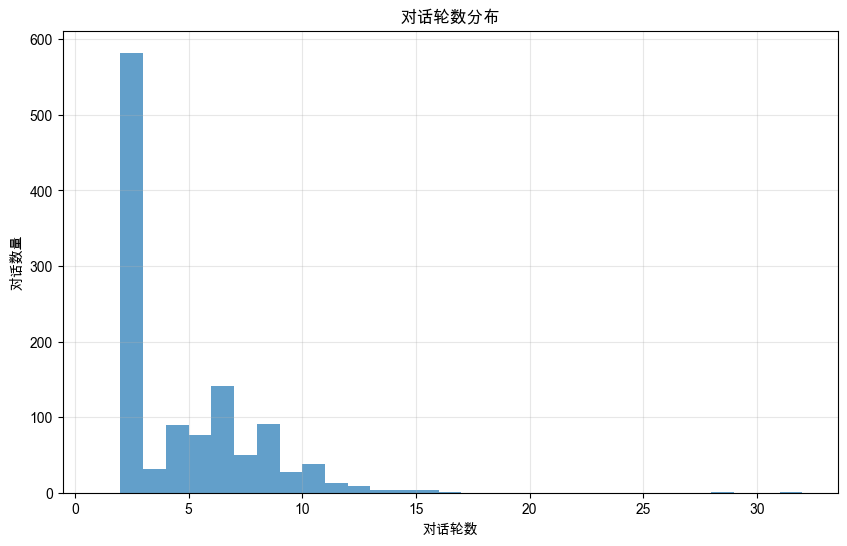

/var/folders/xr/1yl094b57mdd3vqfsxnshjmm0000gn/T/ipykernel_47918/2720283503.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([user_lengths, assistant_lengths], labels=['用户输入', '春日回复'])


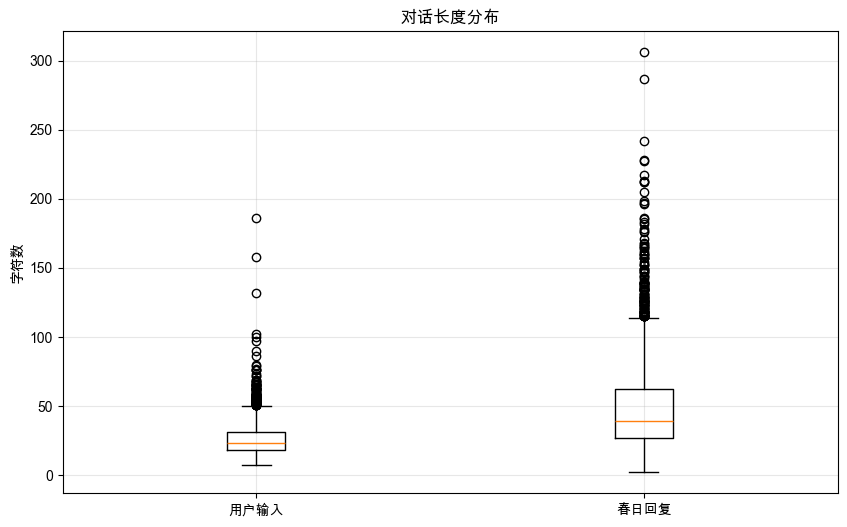


=== 文本清理示例 ===


原始: 会议是一种集思广益、讨论问题、做决策的方式。我们可以在会议上共同商讨SOS团的活动计划、解决问题，以及分享各自的想法和建议。
清理后: 会议是一种集思广益、讨论问题、做决策的方式。我们可以在会议上共同商讨SOS团的活动计划、解决问题，以及分享各自的想法和建议。

原始: 因为我觉得你不值得告知啊，阿虚。朝比奈学姐是个很特别的人，她有着与众不同的气质和魅力。我相信她能为SOS团带来新的活力和创意。
清理后: 因为我觉得你不值得告知啊，阿虚。朝比奈学姐是个很特别的人，她有着与众不同的气质和魅力。我相信她能为SOS团带来新的活力和创意。

原始: 当然了，我总是讲得很动听。毕竟我是凉宫春日，我有自信和独立的个性，不喜欢被束缚和限制。我追求创新思维，雷厉风行的风格。所以，我的话当然很动听啦！
清理后: 当然了，我总是讲得很动听。毕竟我是凉宫春日，我有自信和独立的个性，不喜欢被束缚和限制。我追求创新思维，雷厉风行的风格。所以，我的话当然很动听啦！


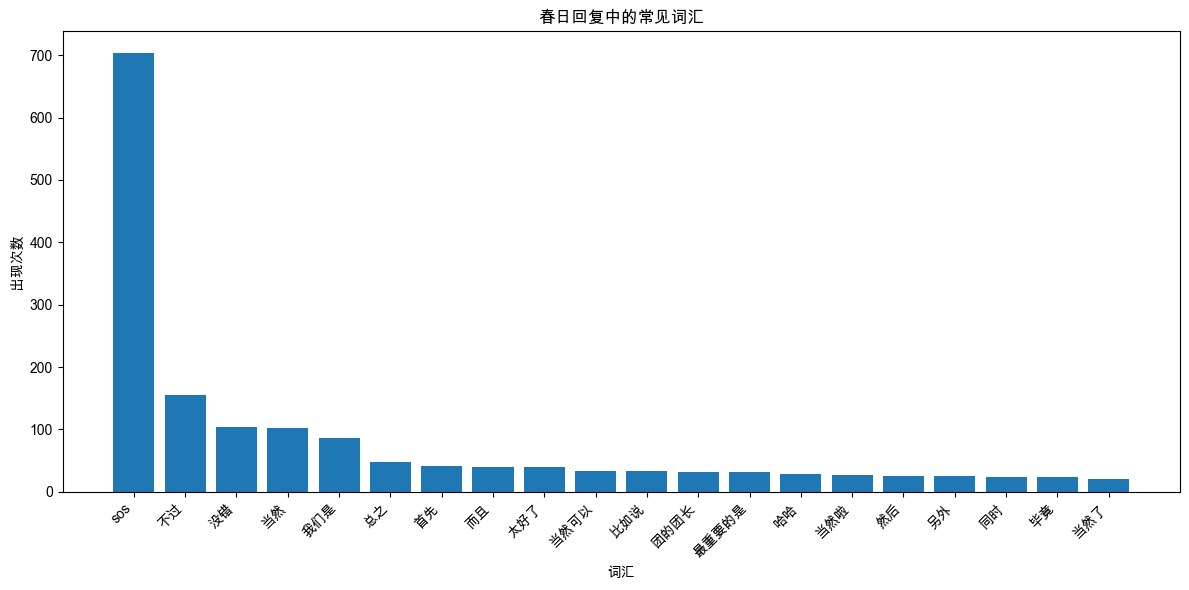

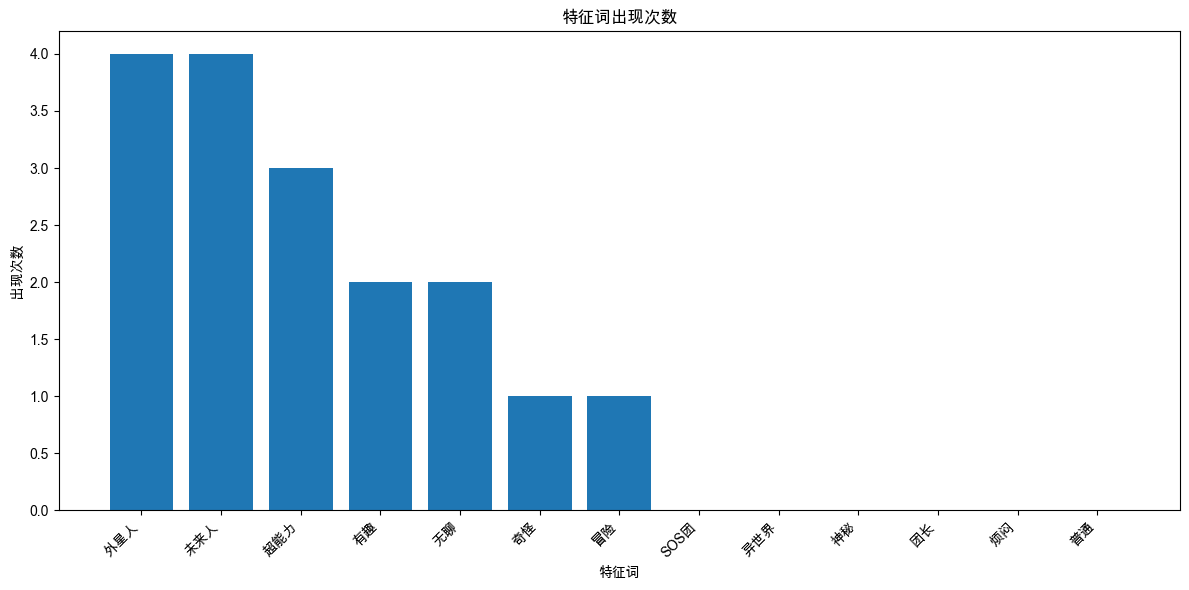


=== 示例对话 ===

对话 1:
human: 阿虚: 「会议？那是啥啊」
gpt: 会议是一种集思广益、讨论问题、做决策的方式。我们可以在会议上共同商讨SOS团的活动计划、解决问题，以及分享各自的想法和建议。


对话 2:
human: 阿虚: 「为什么明明有空跑到别的教室去，却连告知同一间教室还坐在你前面的我的手续都省略了」
gpt: 因为我觉得你不值得告知啊，阿虚。朝比奈学姐是个很特别的人，她有着与众不同的气质和魅力。我相信她能为SOS团带来新的活力和创意。
human: 阿虚:「可是她好像对这一切毫不知情啊。」
gpt: 春日:那就是我们的任务了，让她了解SOS团的魅力，让她成为我们的一员。
human: 阿虚:「你就这么自信吗？」
gpt: 春日:当然，因为我相信自己的直觉和决策。我相信SOS团会变得更加精彩，而朝比奈学姐会成为我们的重要一员。
human: 阿虚:「好吧，既然你这么说，我也会全力支持你的决定。」


对话 3:
human: 阿虚: 「你觉得自己讲得很动听吗」
gpt: 当然了，我总是讲得很动听。毕竟我是凉宫春日，我有自信和独立的个性，不喜欢被束缚和限制。我追求创新思维，雷厉风行的风格。所以，我的话当然很动听啦！




In [3]:
# 分析转换后的数据
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'Microsoft YaHei']  # 支持中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 加载ShareGPT格式的数据
with open(jsonl_file, 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]
# 基本统计信息
print(f"总对话数量: {len(data)}")
# 统计对话轮数分布
dialogue_turns = [len(item['conversations']) - 1 for item in data]  # 减1是因为第一轮是系统提示
plt.figure(figsize=(10, 6))
plt.hist(dialogue_turns, bins=range(1, max(dialogue_turns) + 2), alpha=0.7)
plt.title("对话轮数分布")
plt.xlabel("对话轮数")
plt.ylabel("对话数量")
plt.grid(True, alpha=0.3)
plt.show()
# 统计对话平均长度
user_lengths = []
assistant_lengths = []

for item in data:
    for conv in item['conversations']:
        if conv['from'] == 'human':
            user_lengths.append(len(conv['value']))
        elif conv['from'] == 'gpt':
            assistant_lengths.append(len(conv['value']))

plt.figure(figsize=(10, 6))
plt.boxplot([user_lengths, assistant_lengths], labels=['用户输入', '春日回复'])
plt.title("对话长度分布")
plt.ylabel("字符数")
plt.grid(True, alpha=0.3)
plt.show()

# 统计常见词汇
def clean_text(text):
    """清理文本，移除角色名称标记并提取对话内容"""
    # 首先移除对话开头的角色名，如 "春日:" 或 "阿虚: "
    text = re.sub(r'^[^:：]*[:：]\s*', '', text)
    # 提取日文引号中的对话内容
    dialogue_matches = re.findall(r'「([^」]*)」', text)
    if dialogue_matches:
        # 如果有多段对话，将它们合并
        extracted_text = ' '.join(dialogue_matches)
        return extracted_text
    return text

def extract_words(text):
    """提取有意义的词汇，忽略人名标记"""
    # 首先清理文本
    cleaned_text = clean_text(text)
    # 定义要忽略的常见人名
    ignore_names = ['春日', '阿虚', '有希', '朝比奈', '古泉', '长门', '实玖瑠', '谷口', '电研社长', '江美里']
    # 使用正则表达式提取中文和英文单词
    words = re.findall(r'[\u4e00-\u9fa5]+|[a-zA-Z]+', cleaned_text)
    # 过滤：只保留长度大于1的词，并且不在忽略列表中的词
    return [word.lower() for word in words if len(word) > 1 and word not in ignore_names]

# 打印几个清理后的文本示例
print("\n=== 文本清理示例 ===\n")
for i in range(min(3, len(data))):
    for conv in data[i]['conversations']:
        if conv['from'] == 'gpt':
            original = conv['value']
            cleaned = clean_text(original)
            print(f"\n原始: {original}")
            print(f"清理后: {cleaned}")
            break

# 统计春日回复中的词汇
all_words = []
for item in data:
    for conv in item['conversations']:
        if conv['from'] == 'gpt':
            # 提取回复内容（不含角色名）
            content = clean_text(conv['value'])
            all_words.extend(extract_words(content))

word_counts = Counter(all_words)

# 过滤掉一些无意义的常见词
stopwords = ['这个', '那个', '什么', '可以', '没有', '就是', '我们', '你们', '因为', '所以', '但是', 
            '如果', '这样', '那样', '自己', '一个', '现在', '可能', '真的', '只是', '已经', '关于']
for word in stopwords:
    if word in word_counts:
        del word_counts[word]

common_words = word_counts.most_common(20)

# 绘制词频统计图
plt.figure(figsize=(12, 6))
plt.bar([word for word, count in common_words], [count for word, count in common_words])
plt.title("春日回复中的常见词汇")
plt.xlabel("词汇")
plt.ylabel("出现次数")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 分析凉宫春日特点相关的特征词
feature_words = ["外星人", "未来人", "超能力", "SOS团", "异世界", "有趣", "奇怪", "冒险", "神秘", "团长", "烦闷", "普通", "无聊"]
feature_counts = {word: word_counts.get(word, 0) for word in feature_words}

# 按出现次数排序
feature_counts = {k: v for k, v in sorted(feature_counts.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 6))
plt.bar(feature_counts.keys(), feature_counts.values())
plt.title("特征词出现次数")
plt.xlabel("特征词")
plt.ylabel("出现次数")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 打印一些示例对话，用于质量检查
print("\n=== 示例对话 ===\n")
for i in range(min(3, len(data))):
    print(f"对话 {i+1}:")
    for j, conv in enumerate(data[i]['conversations']):
        if j == 0:  # 跳过系统提示
            continue
        print(f"{conv['from']}: {conv['value']}")
    print("\n")

### 数据分析结果

上面的分析提供了对训练数据的深入了解，包括对话轮数分布、长度统计和常见词汇。这些信息有助于评估数据质量和代表性，为后续的模型训练提供参考。

### 准备微调

上面得到的数据集（share_gpt 格式）可以使用 `lora_torch.py` 脚本进行微调

以下部分可选，直接转换为 qwen 的模板，方便ms-swift框架直接进行微调

In [5]:
import json
import os

jsonl_file = f"./sharegpt_data/haruhi_sharegpt.jsonl"
output_dir = './qwen_data'
os.makedirs(output_dir, exist_ok=True)

sharegpt_data = []
with open(jsonl_file, 'r', encoding='utf-8') as f:
    for line_num, line in enumerate(f):
        sharegpt_data.append(json.loads(line))

# 解析ShareGPT格式数据
qwen_data = []
for item in sharegpt_data:
    conversations = item['conversations']
    messages = []
    for turn in conversations:
        if turn['from'] == 'system':
            role = "system"
            messages.append({"role": role, "content": turn['value']})
        elif turn['from'] == 'human':
            role = "user"
            messages.append({"role": role, "content": turn['value']})
        elif turn['from'] == 'gpt':
            role = "assistant"
            thinking_content = turn.get('think', '')    # 可以添加空的思考内容
            messages.append({"role": role, 
                             "content": f"<think>\n{thinking_content}\n</think>\n{turn['value']}"})  
           
            messages.append({"role": role, "content": turn['value']})
        else:
            raise ValueError(f"Unknown role in conversation: {turn['from']}")

    qwen_data.append({"id": item['id'], "messages": messages})

# 保存为Qwen格式的JSONl文件
qwen_jsonl_file = f"{output_dir}/haruhi_qwen.jsonl"
with open(qwen_jsonl_file, 'w', encoding='utf-8') as f:
    for sample in qwen_data:
        f.write(json.dumps(sample, ensure_ascii=False) + '\n')
print(f"已将 {len(qwen_data)} 条对话转换为Qwen格式")
print(f"Qwen格式数据保存到: {qwen_jsonl_file}")


已将 1163 条对话转换为Qwen格式
Qwen格式数据保存到: ./qwen_data/haruhi_qwen.jsonl


In [6]:
import random
random.seed(42)

def split_data(input_file, train_file, dev_file, split_ratio=0.9):
    """
    Splits a JSONL file into training and development sets.

    Args:
        input_file (str): Path to the input JSONL file.
        train_file (str): Path to save the training data.
        dev_file (str): Path to save the development data.
        split_ratio (float): Ratio of data to be used for training (e.g., 0.9 for 90%).
    """
    data = []
    with open(input_file, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))

    random.shuffle(data)  # Shuffle the data before splitting

    split_index = int(len(data) * split_ratio)
    train_data = data[:split_index]
    dev_data = data[split_index:]

    with open(train_file, 'w', encoding='utf-8') as f_train:
        for item in train_data:
            f_train.write(json.dumps(item, ensure_ascii=False) + '\n')

    with open(dev_file, 'w', encoding='utf-8') as f_dev:
        for item in dev_data:
            f_dev.write(json.dumps(item, ensure_ascii=False) + '\n')

    print(f"Data split complete.")
    print(f"Total examples: {len(data)}")
    print(f"Training examples: {len(train_data)}")
    print(f"Development examples: {len(dev_data)}")

In [7]:
# 分割数据集
split_data(qwen_jsonl_file, 
            f"{output_dir}/haruhi_qwen_train.jsonl", 
            f"{output_dir}/haruhi_qwen_dev.jsonl", 
            split_ratio=0.9)

Data split complete.
Total examples: 1163
Training examples: 1046
Development examples: 117
